In [1]:
log_file = "madish.log"

import numpy as np
import pandas as pd
import coba.benchmarks as cb

result = cb.Result.from_file(log_file)
l,s,b  = result.to_pandas()

repeat_cols = { col:np.repeat(b[col].values, b['N'].apply(len)) for col in b.columns.drop(['C','A','N','reward']) }
spread_cols = { col:np.concatenate(b[col].values) for col in ['reward'] }
index_col   = { "index":1+np.concatenate([np.arange(i) for i in b['reward'].apply(len)]) }

r       = pd.DataFrame({**repeat_cols, **spread_cols, **index_col})
cmp_ids = b.simulation_id.value_counts().reset_index(name="count").query(f"count == {len(l)}")["index"]

r = r[(r['learner_id'] != 5)]

In [62]:
def create_plot(openml_id=None, steps=10000, span=None):
    
    if openml_id is not None:
        sim_ids = s[ s['pipe'].str.contains(f":{steps}") & s['pipe'].str.contains(f":{openml_id}") ].simulation_id.values
    else:
        sim_ids = s[ s['pipe'].str.contains(f":{steps}")                                           ].simulation_id.values

    if steps == 10000:
        rf = r[r.simulation_id.isin(sim_ids) & r.simulation_id.isin(cmp_ids)]
    else:
        rf = r[r.simulation_id.isin(sim_ids)]
    
    df = pd.merge(rf,l).sort_values(['full_name']).groupby(['full_name', 'index']).agg({"reward":"mean"}).unstack(level=0)
    
    if span is None:
        df.expanding().mean().plot()
    else:
        df.ewm(span=span).mean().plot()

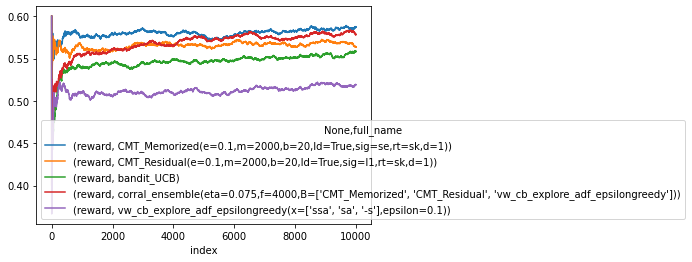

In [46]:
# eeg-eye-state -- predict if eyes are open or closed
#   2 even classes
#   14 numeric features
create_plot(1471, 10000, 2000)

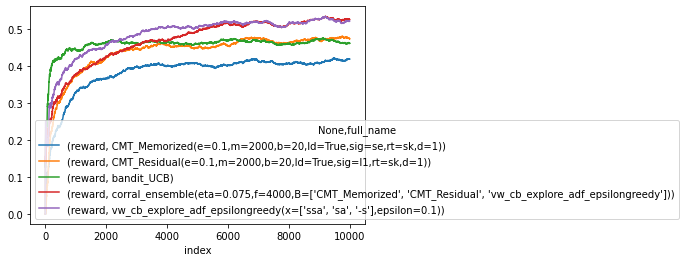

In [45]:
# covertype
#   7 classes dominated by 2
#   55 features both nominal and numeric

create_plot(180, 10000, 2000)

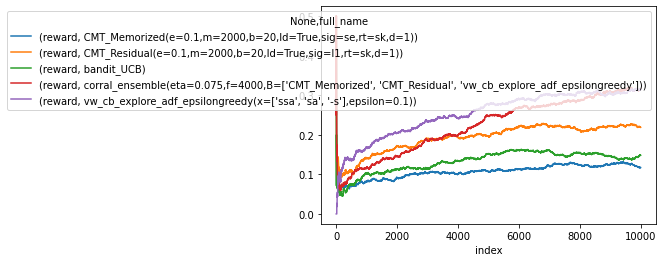

In [68]:
#kropt -- predict number of moves until checkmate given coordinates of white king, white rook and black king
#   18 classes, sort of normally distributed
#   3 nominal numeric features (1-8)
#   3 nominal alpha features (a-h)

create_plot(184, 10000, 2000)

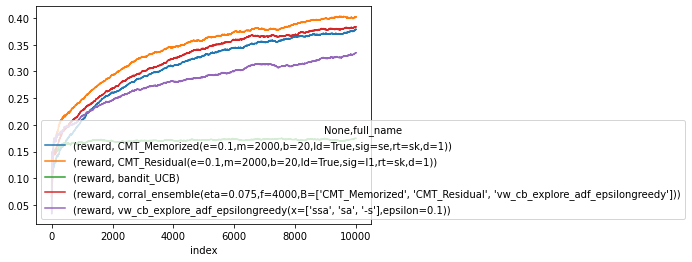

In [48]:
#letter -- all capital, 20 different fonts with distortions
#   26 classes
#   16 numerical features describing letters

create_plot(6, 10000, 2000)

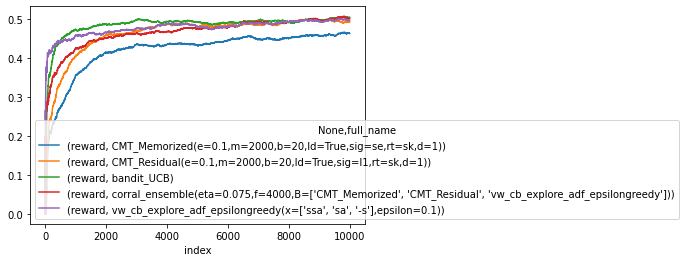

In [49]:
#pokerhand
#    10 classes dominated by 2
#    10 nominal values representing rank and suit of all 5 cards
create_plot(155, 10000, 2000)

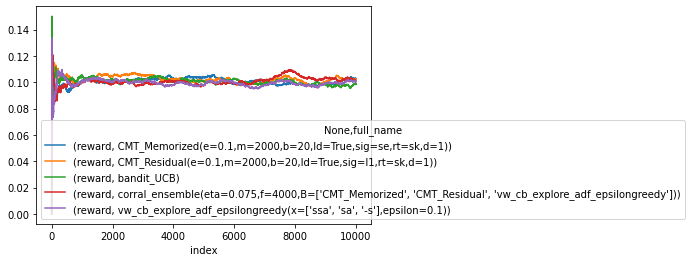

In [50]:
# spoken-arabic-digit
#     10 evenly distributed classes
#     14 numeric features
create_plot(1503, 10000, 2000)

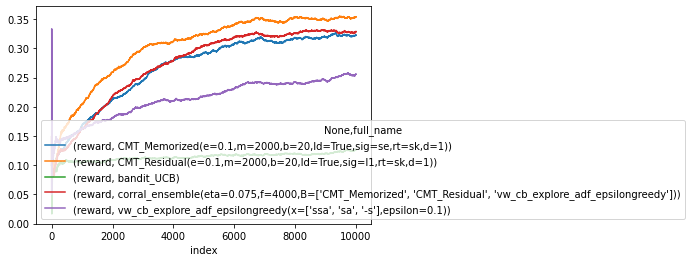

In [51]:
# artificial-characters
#    10 even classes (A, C, D, E, F, G, H, L, P, R)
#    7 numeric features
create_plot(1459, 10000, 2000)

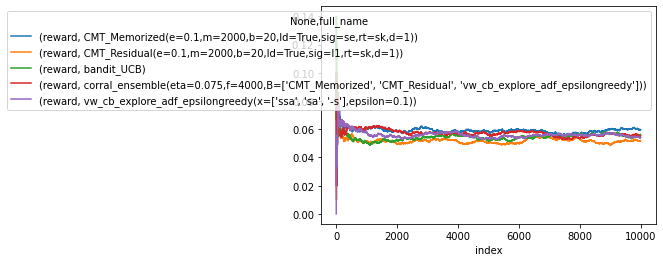

In [52]:
# tamilnadu-electricity -- predict sector of economy
#    20 mostly even classes
#    2 numeric features
create_plot(40985, 10000, 2000)

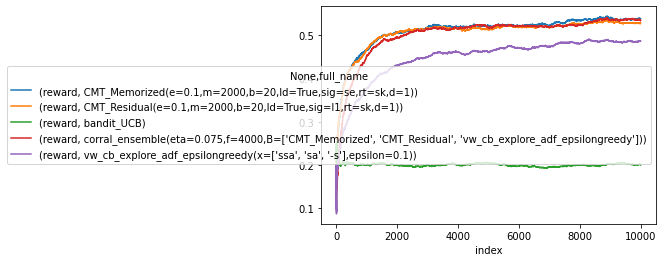

In [53]:
# hls4ml_lhc_jets_hlf -- identify particle jets in LHC
#     5 classes of particle (quark, gluon, boson, etc.)
#     16 numeric classes
create_plot(42468, 10000, 2000)

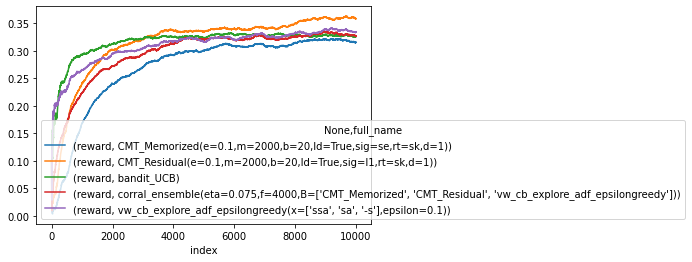

In [54]:
# ldpa -- Localization Data for Person Activity
#      11 unique classes dominated by 4 features
#      2 nominal features
#      4 numeric features
create_plot(1483, 10000, 2000)

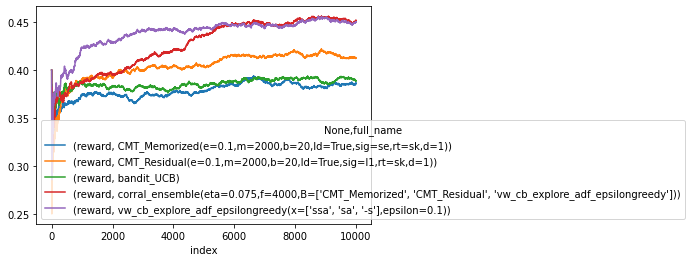

In [55]:
# eye_movements
#    3 uniformaly distributed classes
#    27 features of both nominal and numeric values
create_plot(1044, 10000, 2000)

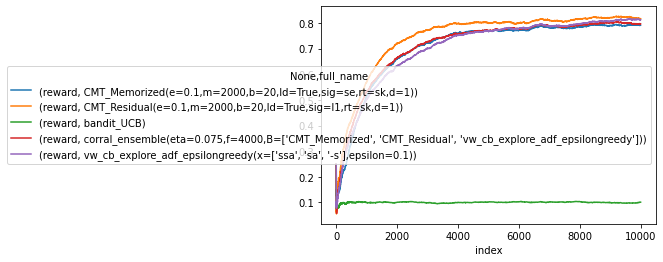

In [56]:
# pendigits -- 250 samples from 44 writers of the numbers 0-9
#    10 uniformly distributed classes (0-9)
#    16 numeric features that have been discretized
create_plot(32, 10000, 2000)

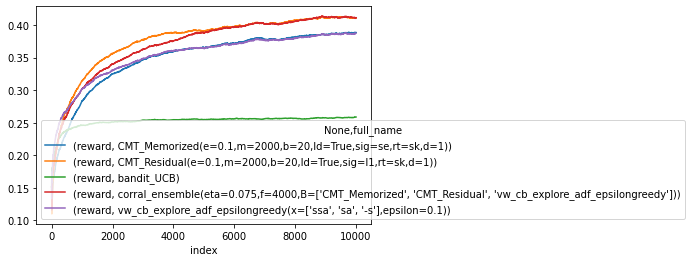

In [67]:
# All of the above averaged into one plot 
# 1471, 180, 184, 6, 155, 1503, 1459, 40985, 42468, 1483, 1044, 32
create_plot(None, 10000, 2000)

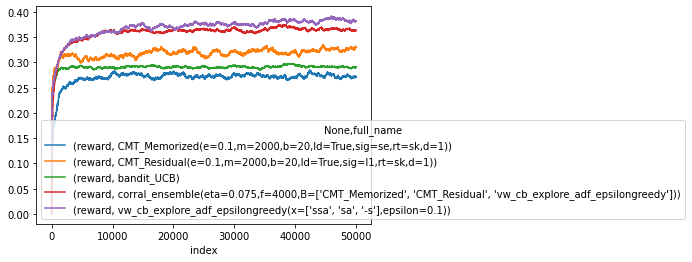

In [69]:
# 180, 155, 1503, 42468, 1483
#this never finished running
create_plot(None, 50000, 2000)